In [ ]:
pip install python-binance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 4.4 MB/s eta 0:00:00


In [ ]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import datetime
from datetime import timezone
from matplotlib import pyplot as plt
import pandas as pd
import csv

# OUR KEYS
api_key = 'key'
api_secret = 'secret'
client = Client(api_key, api_secret)

#TWO FUNCTIONS TO MANAGE THE DATE
def unix_to_datetime(unix_time):
    return datetime.datetime.fromtimestamp(unix_time/1000)

def days_to_unix(date,numOfDays):
    date = datetime.datetime.now()
    date = date.replace(hour=0, minute=0, second=0, microsecond=0)
    date = date - datetime.timedelta(days=numOfDays)
    return int(date.timestamp()*1000)

def date_to_unix(year,month,day):
    dt =  datetime.datetime(year,month,day,0,0)
    return str(dt.replace(tzinfo=timezone.utc).timestamp())

def csv_converter(fileName,dataSet):
    with open(fileName, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(dataSet)
    
# THE CRYPTO WE ARE GOING TO TRACK
# crypto = ['BTCUSDT','ETHUSDT','LTCUSDT']
crypto = ['BTCUSDT']
results = []

for coin in crypto:
    klines = client.get_historical_klines(
        coin, Client.KLINE_INTERVAL_1DAY,"1 Feb, 2021","1 Feb, 2023")
    results.append(klines)

for i in range(len(crypto)): 
    values = [[unix_to_datetime(el[0]),float(el[1])] for el in results[i]]
    df = pd.DataFrame(values, columns=['ds', 'y'])
    plt.plot(df['ds'], df['y'])
    plt.xticks(rotation=45)
    plt.show()
    
for i in range(len(crypto)):
    csv_converter(crypto[i]+".csv",results[i])

https://python-binance.readthedocs.io/en/latest/binance.html?highlight=client.get_historical_klines#binance.client.Client.get_historical_klines

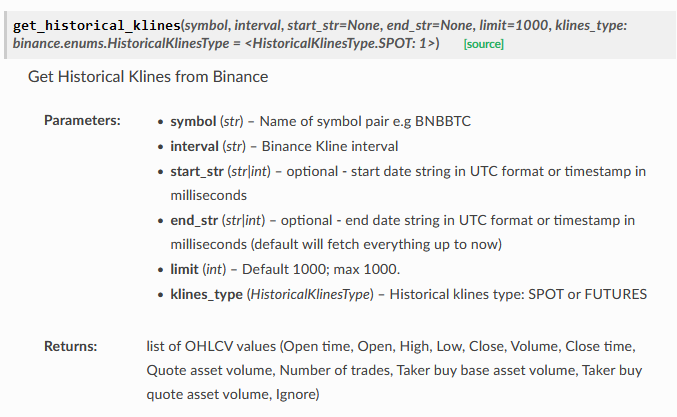

In [ ]:
for i in range(len(crypto)):
    csv_converter(crypto[i]+".csv",results[i])

[1660003200000, '23810.98000000', '23835.00000000', '23797.27000000', '23823.55000000', '338.98437000', 1660003499999, '8073064.38086040', 15889, '182.43168000', '4344703.11547110', '0']


15m
